Project Name : Cyber Bullying Detection and Mitigation

Team Members : Prasanthi Mandagani, Komatireddy Ruchitha, Chennamshetti Durga Aishwarya

Dataset Used : https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data

Code Structure:

Part 1 - Loading Dataset
1. Loaded csv dataset (Note: Make sure to upload csv file to your drive and reset the path accordingly)
2. re-named columns for convenience
3. Raplaced labels to numberic values.

Part 2 - Train, Valid and Test Split
1. Split X and Y into train and test with 80:20 division
2. Then Split X_Train and Y_Train into train and validation with 80:20 division

Part 3 - Pre-processing
1. Maintained Slang word dictionary and replaced slang words with their fullforms.
2. Removed stop words using nltk.
3. Performed Lemmatisation using WordNetLemmatizer in nltk.
4. Performed pre-processing on all 3 i.e X_train, X_Valid and X_Test data.
5. Performed Oversampling on Train data to create balance

Part 4 - Working with Bert
1. Initialising BertTockenizer
2. Preparing data for bertmodels
3. Initialising BertClassifier
4. Training and Validation of data

Part 5 - Evaluation and Mitigation
1. Prediction of Data
2. Mitigation and feedback loop algorithm




In [ ]:
import pandas as pd

Part 1 - Loading Dataset

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the original dataset
# df = pd.read_csv('/content/drive/MyDrive/UCD /Spring 2025/Project- Cyber Bullying Detection and mitigation/cyberbullying_tweets.csv')
# df = pd.read_csv('/content/drive/MyDrive/ML Project/cyberbullying_tweets.csv')
df = pd.read_csv('/content/drive/MyDrive/ML Project/cyberbullying_tweets.csv')

print(df.shape)
df.head()

(47692, 2)


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
# Re-naming the columns and removing duplicates
def rename_columns(df):
    df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
    df = df[~df.duplicated()]
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
df = rename_columns(df)
df.sentiment.value_counts()

,count
sentiment,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


In [ ]:
# encoding labels
df = df[df["sentiment"]!="other_cyberbullying"]
df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

<ipython-input-7-aeb8a061ccae>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})
<ipython-input-7-aeb8a061ccae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})


In [ ]:
# !pip install langdetect
# import langdetect
# from langdetect import detect

# # Detecting and removing non-english tweets
# def detect_english(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False

# df = df[df['text'].apply(detect_english)]
# df.sentiment.value_counts()

Part 2 - Train, Valid, Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2042)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2042)

Part 3 - Preprocessing

In [ ]:
import numpy as np

import string
punctuation = string.punctuation

import nltk
import re

# Download stopwords list dari nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
slang_dict = {
    'lmao': 'laughing my ass off',
    'k': 'okay',
    'y': 'why',
    'andme': 'and me',
    'ftsomething': 'face time something',
    'fkcn': 'fucking',
    '1 st': 'first',
    'init': 'is not it',
    'comp': 'compensation',
    'arr': 'arrive',
    'studs': 'students',
    'tho': 'though',
    'irl': 'in real life',
    'iykyk': 'if you know, you know',
    'fr': 'for real',
    'brb': 'be right back',
    'idk': 'i do not know',
    'imo': 'in my opinion',
    'omg': 'oh my god',
    'btw': 'by the way',
    'ttyl': 'talk to you later',
    'smh': 'shaking my head',
    'tbh': 'to be honest',
    'nvm': 'never mind',
    'gtg': 'got to go',
    'dm': 'direct message',
    'rn': 'right now',
    'np': 'no problem',
    'lol': 'laughing out loud',
    'pls': 'please',
    'omw': 'on my way',
    'fyi': 'for your information',
    'b4': 'before',
    'ppl': 'people'
}

# replacing slag words with fullforms
def replace_slang(text):
    for word, replacement in slang_dict.items():
        text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, text)
    return text

In [ ]:
# Function to clean and preprocess the text data
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', punctuation)).lower()
    text = replace_slang(text)
    text_cleaned = " ".join([word for word in text.split() if word not in stop_words])
    text_lemmatized = " ".join([lemmatizer.lemmatize(word) for word in text_cleaned.split()])
    return text_lemmatized

In [ ]:
print(X_train)

39331    i think this is one of the more grating qualit...
10509    all my bitches bad, you'll never see me around...
36906    Love seeing the girls that bullied me in high ...
45551    From one Texan to another. You’re in East Texa...
40859    Fuck you where we're you when you were playing...
                               ...                        
2640     RT @Celz29: “@TVWEEKmag: You walk by putting o...
14283    I wanna feel bad for you but then i remember y...
44234    So you mean to tell me that this so called fre...
3836     What's the difference between a pancake and ho...
43997    #Events #Event - Interior Ministry launches ma...
Name: text, Length: 25492, dtype: object


In [ ]:
X_train = X_train.apply(preprocess_text).to_list()
X_valid = X_valid.apply(preprocess_text).to_list()
X_test = X_test.apply(preprocess_text).to_list()

print(X_train)

['think one grating quality actually like bullied hot girl high school', 'bitch bad youll never see around ugly female ð\x9f\x98\x82', 'love seeing girl bullied high school lookin bad', 'one texan another you’re east texas part texas still “blind” time i’m sure don’t want called honkie gringao cracker doesn’t matter “polite” word negro white man pc way using nword', 'fuck playing game dumb whore bitch say face nigger', 'one hand call rajtarangni written 12th century muslim rule myth boast assessment without evidence pandits mughal rule true sort fakery may win brownie point among idiot totally illogical', 'bullieslolol trump created school bully', 'umarfarooq faheemhus jackmjenkins atlantic got exactly right every point thinkprogress easily refuted', 'dylan roof cousin think given enough wit hope thats yeast anything brother getting hung noose legislation getting past people expect u', 'hit bird morning got caught underneath car car listen die awful', 'wherever hindu entire asia includ

Oversampling of Train dataset

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5117],
       [   1, 5115],
       [   2, 5094],
       [   3, 5086],
       [   4, 5080]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [ ]:
X_train_os = X_train_os.flatten()
y_train_os = y_train_os.flatten()

(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5117],
       [   1, 5117],
       [   2, 5117],
       [   3, 5117],
       [   4, 5117]])

Part 3 - Working with Bert Models

In [ ]:
import torch
import torch.nn as nn

import transformers
from transformers import BertTokenizer, BertModel

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
from transformers.optimization import get_linear_schedule_with_warmup

Initialising Bert Tockenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=MAX_LEN,             # Choose max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Tokenize train tweets
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_train]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  323


In [ ]:
MAX_LEN = 128

Preparing Data for Bert Models

In [ ]:
train_inputs, train_masks = bert_tokenizer(X_train_os)
val_inputs, val_masks = bert_tokenizer(np.array(X_valid))
test_inputs, test_masks = bert_tokenizer(np.array(X_test))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train_os)
val_labels = torch.from_numpy(np.array(y_valid))
test_labels = torch.from_numpy(np.array(y_test))

In [ ]:
batch_size = 32

In [ ]:
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

Initialising Bert Classifier

In [ ]:
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        # Specify hidden size of BERT, hidden size of the classifier, and number of labels
        n_input = 768
        n_hidden = 50
        n_output = 5

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate the classifier (a fully connected layer followed by a ReLU activation and another fully connected layer)
        self.classifier = nn.Sequential(
            nn.Linear(n_input, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )

        # Freeze the BERT model weights if freeze_bert is True (useful for feature extraction without fine-tuning)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input data (input_ids and attention_mask) to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the `[CLS]` token from the BERT output (useful for classification tasks)
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed the extracted hidden state to the classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
# Function for initializing the BERT Classifier model, optimizer, and learning rate scheduler
def initialize_model(epochs=4):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)

    bert_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Define the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS=2

print(device)

cuda


In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=EPOCHS)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Training and Validation of Bert Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import time
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()

def bert_train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print("-"*10)
        print("Epoch : {}".format(epoch_i+1))
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^7} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        ###TRAINING###

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts +=1

            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass and get logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update model parameters:
            # fine tune BERT params and train additional dense layers
            optimizer.step()
            # update learning rate
            scheduler.step()

            # Print the loss values and time elapsed for every 100 batches
            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                print(f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        ###EVALUATION###

        # Put the model into the evaluation mode
        model.eval()

        # Define empty lists to host accuracy and validation for each batch
        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            val_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the validation accuracy
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)

        # Compute the average accuracy and loss over the validation set
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)

        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(f"{'AVG TRAIN LOSS':^12} | {'VAL LOSS':^10} | {'VAL ACCURACY (%)':^9} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")

    print("Training complete!")

In [ ]:
bert_train(bert_classifier, train_dataloader, val_dataloader, epochs=EPOCHS)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.593009   |   62.10  
   200    |   0.270799   |   63.57  
   300    |   0.229395   |   63.19  
   400    |   0.234992   |   62.97  
   500    |   0.223238   |   63.01  
   600    |   0.208452   |   63.02  
   700    |   0.195446   |   62.82  
   799    |   0.185180   |   62.10  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.268074    |  0.201145  |       93.66       |  545.21  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.129301   |   63.15  
   200    |   0.131757   |   63.04  
   3

In [ ]:
torch.save(bert_classifier.state_dict(), "bert_classifier.pth")
tokenizer.save_pretrained("tokenizer/")
torch.save(optimizer.state_dict(), "optimizer.pth")
torch.save(scheduler.state_dict(), "scheduler.pth")

Part 5 - Evaluation and Mitigation

Prediction using Bert Model

In [ ]:
def bert_predict(model, test_dataloader):

    # Define empty list to host the predictions
    preds_list = []

    # Put the model into evaluation mode
    model.eval()

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(t.to(device) for t in batch)[:2]

        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)

        # Get index of highest logit
        pred = torch.argmax(logit,dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

In [ ]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

In [ ]:
sentiments = ["religion","age","ethnicity","gender","not bullying"]
print('Classification Report for BERT :\n', classification_report(y_test, bert_preds, target_names=sentiments))

Classification Report for BERT :
               precision    recall  f1-score   support

    religion       0.96      0.97      0.97      1600
         age       0.99      0.98      0.99      1598
   ethnicity       0.99      0.99      0.99      1592
      gender       0.91      0.90      0.91      1590
not bullying       0.87      0.87      0.87      1587

    accuracy                           0.94      7967
   macro avg       0.94      0.94      0.94      7967
weighted avg       0.94      0.94      0.94      7967



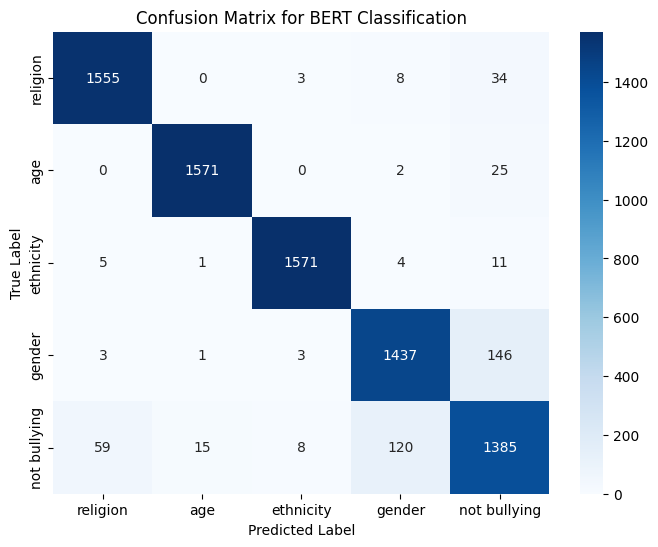

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, bert_preds)
# print(cm)

# Define labels
labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for BERT Classification')
plt.show()

Continuous Learning and Mitigation

In [ ]:
# {'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4}
print(sentiments)

['religion', 'age', 'ethnicity', 'gender', 'not bullying']


In [ ]:
def reinitialiseAndReTrain_model(bert_classifier, text_inputs, text_masks, correct_label):
  bert_classifier.train()

  text_data = TensorDataset(text_inputs, text_masks, correct_label)
  text_sampler = RandomSampler(text_data)
  text_dataloader = DataLoader(text_data, sampler=text_sampler, batch_size=batch_size)

  bert_train(bert_classifier, text_dataloader, val_dataloader, 1)

  torch.save(bert_classifier.state_dict(), "bert_classifier.pth")
  tokenizer.save_pretrained("tokenizer/")
  torch.save(optimizer.state_dict(), "optimizer.pth")
  torch.save(scheduler.state_dict(), "scheduler.pth")


In [ ]:
def classify_and_mitigate(text):
    # Predict
    preprocessed_text = [preprocess_text(text) for text in texts]
    text_inputs, text_masks = bert_tokenizer(preprocessed_text)

    text_inputs = text_inputs.to(device)
    text_masks = text_masks.to(device)
    bert_classifier = Bert_Classifier()
    bert_classifier.load_state_dict(torch.load("bert_classifier.pth"))
    bert_classifier.to(device)

    bert_classifier.eval()
    # Avoid gradient calculation of tensors by using "no_grad()" method
    with torch.no_grad():
      logit = bert_classifier(text_inputs, text_masks)

    # Get index of highest logit
    pred = torch.argmax(logit,dim=1).cpu().numpy()

    print('model prediction : ', sentiments[pred[0]])

    if pred[0] != 4:
      # Mitigation
      print(f"⚠️ Message flagged as: {sentiments[pred[0]]} bullying")
      feedback = input("Was the original message bullying? (y/n): ").strip().lower()
      if feedback == "n":
        correct_label = torch.tensor([4])
        # train_text(bert_classifier, text_inputs, text_masks, correct_label.to(device))
        reinitialiseAndReTrain_model(text_inputs, text_masks, correct_label.to(device))

        # train_single_example(model, optimizer, example)
        print("Model updated (was not bullying).\n")
      else:
        print("Model prediction confirmed as bullying.\n")
    else:
        # Feedback on false negatives
        feedback = input("Was this actually bullying? (y/n): ").strip().lower()
        if feedback == "y":
          correct_label = torch.tensor([int(input("Which bullying is it? Input based on this encoding 'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4 -> "))])
          print("training to correct label : ", correct_label[0])
          reinitialiseAndReTrain_model(bert_classifier, text_inputs, text_masks, correct_label.to(device))
          # train_text(bert_classifier, text_inputs, text_masks, correct_label)
          print("Model updated (was bullying).\n")
        else:
          print("Model prediction confirmed as not bullying.\n")

In [ ]:
texts = ["People like you and your weird beliefs don’t belong here."]
classify_and_mitigate(texts)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model prediction :  not bullying
Was this actually bullying? (y/n): y
Which bullying is it? Input based on this encoding 'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4 -> 0
training to correct label :  tensor(0)
Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
    0     |   0.847849   |   0.05   
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.847849    |  0.171761  |       94.27       |   43.11  
-------------------------------------------------------------


Training complete!
Model updated (was bullying).



In [ ]:
texts = ["People like you and your weird beliefs don’t belong here."]
classify_and_mitigate(texts)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model prediction :  religion
⚠️ Message flagged as: religion bullying
Was the original message bullying? (y/n): y
Model prediction confirmed as bullying.



In [ ]:
texts = ["You're too old to be using this app—go back to retirement!"]
classify_and_mitigate(texts)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model prediction :  not bullying
Was this actually bullying? (y/n): y
Which bullying is it? Input based on this encoding 'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4 -> 1
training to correct label :  tensor(1)
Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
    0     |   4.849141   |   0.04   
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   4.849141    |  0.183233  |       93.92       |   44.39  
-------------------------------------------------------------


Training complete!
Model updated (was bullying).



In [ ]:
texts = ["People like you and your weird beliefs don’t belong here."]
classify_and_mitigate(texts)

model prediction :  religion
⚠️ Message flagged as: religion bullying
Was the original message bullying? (y/n): y
Model prediction confirmed as bullying.



In [ ]:
!pip freeze > requirements.txt